# Exploring the Titanic data set

In [1]:
#Importing the libraries that are likely to be used 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline


In [4]:
print(os.getcwd()) #This is to get the current working directory.

/Users/motun


In [7]:
%cd /Users/motun/Desktop/Python/Olympics_data/Data 
#This is to chnage the working directory to the folder that contains the Titanic data set in my computer
# I tried using the os.chdir from the os module, but I use a mac and it did not seem to work. 
#So Stack overflow provided this option which worked perfectly. (Ps, restart the kernel to use this option)

/Users/motun/Desktop/Python/Olympics_data/Data


In [8]:
print(os.getcwd())
#Printing the workign directory once more to be sure it has been changed

/Users/motun/Desktop/Python/Olympics_data/Data


In [14]:
events = pd.read_csv("athlete_events.csv") 
regions = pd.read_csv("noc_regions.csv")
#These two have no output. Note that if your files are on a drive, you need to make sure they are downloaded 
#on the computer otherwise you will get an error

#Now that the files are read, I will do a basic exploration of the data to understand the structure

In [16]:
print(events.info())
#info gives a quick overview of the data set. number of columns, column names, data type, counts the number of nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [17]:
events.describe()
#.describe however gives a statistical summary of the data. mean, standard deviation, max, min

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [18]:
#You might wonder why the above summary is necessary. I can already see there are 271116 records, but only 
#261642 age record. Its likely that some people's ages are missing. same for height and weight. Year seems ok 
# The minimum age is 10 and someone participated at 97 years old!!! Avg age is about 26
# A standard deviation of 6 tells me 95% of the participants are age 14 to 38. assuming the distribution is normal

In [27]:
#I am curious to find out the number of participants below 14 years of age 
age_below_14 = events[(events['Age'] < 14)]
print(age_below_14)
age_below_14.describe()

            ID                                           Name Sex   Age  \
5224      2962                                  Zsuzsa Almssy   F  13.0   
7500      4191  Tojohanitra Tokin'aina Andriamanjatoarimanana   F  13.0   
9648      5291                        Marcia Arriaga Larrinua   F  12.0   
9649      5291                        Marcia Arriaga Larrinua   F  12.0   
9650      5291                        Marcia Arriaga Larrinua   F  12.0   
...        ...                                            ...  ..   ...   
265497  132855                        Wei Ling "Joscelin" Yeo   F  13.0   
265498  132855                        Wei Ling "Joscelin" Yeo   F  13.0   
265499  132855                        Wei Ling "Joscelin" Yeo   F  13.0   
265800  132998                            Yip Tsz Wa "Yvonne"   F  13.0   
268602  134381                                    Klaus Zerta   M  13.0   

        Height  Weight        Team  NOC        Games  Year  Season  \
5224     158.0    60.0     Hu

,ID,Age,Height,Weight,Year
count,240.000000,240.000000,201.000000,196.000000,240.000000
mean,62889.445833,12.716667,161.109453,50.512755,1970.491667
std,38023.306476,0.581203,8.586499,9.372277,22.050720
min,2962.000000,10.000000,137.000000,28.000000,1896.000000
25%,28734.500000,13.000000,155.000000,45.750000,1964.000000
50%,55553.000000,13.000000,162.000000,50.000000,1974.000000
75%,95801.000000,13.000000,168.000000,56.000000,1984.000000
max,134381.000000,13.000000,183.000000,80.000000,2016.000000


In [28]:
#There are only 240 people below age 14 who have participated in the olympics between 1896 and 2016

In [30]:
age_above_70 = events[(events['Age'] > 70)]
print(age_above_70)
age_above_70.describe()

            ID                                       Name Sex   Age  Height  \
2392      1337                               Olof Ahlberg   M  71.0     NaN   
7433      4160                         Robert Day Andrews   M  75.0     NaN   
9371      5146                      George Denholm Armour   M  84.0     NaN   
11011     6016      Winifred Marie Louise Austen (-Frick)   F  72.0     NaN   
11012     6016      Winifred Marie Louise Austen (-Frick)   F  72.0     NaN   
...        ...                                        ...  ..   ...     ...   
253306  126841                       Konstantns Visotskis   M  72.0     NaN   
254475  127395  Arthur von Pongracz de Szent-Mikls und vr   M  72.0     NaN   
254476  127395  Arthur von Pongracz de Szent-Mikls und vr   M  72.0     NaN   
257054  128719                     John Quincy Adams Ward   M  97.0     NaN   
260799  130491                   Thomas William Wilkinson   M  72.0     NaN   

        Weight           Team  NOC        Games  Ye

,ID,Age,Height,Weight,Year
count,101.000000,101.000000,2.0,1.0,101.000000
mean,63477.801980,73.980198,168.0,62.0,1932.277228
std,37220.072481,4.855883,0.0,NaN,14.513524
min,1337.000000,71.000000,168.0,62.0,1900.000000
25%,30731.000000,71.000000,168.0,62.0,1924.000000
50%,67219.000000,72.000000,168.0,62.0,1932.000000
75%,96102.000000,74.000000,168.0,62.0,1936.000000
max,130491.000000,97.000000,168.0,62.0,2012.000000


In [31]:
 #I initially decided on 38 as the higher extreme, but realised there were over 10,000 participants in that age
# So I intuitively decided 70 was more of a higher extreme age with only 101 people.

In [32]:
#Now I want to see which sports are common for the two age extreme. Do certain sport types allow for extrem ages

In [35]:

age_below_14['Sport'].value_counts()

Swimming                     135
Gymnastics                    41
Figure Skating                26
Rowing                        17
Diving                        10
Athletics                      4
Speed Skating                  2
Tennis                         1
Sailing                        1
Rhythmic Gymnastics            1
Freestyle Skiing               1
Short Track Speed Skating      1
Name: Sport, dtype: int64

In [ ]:
#Swimming is the most popular sport for participants below 14 years.

In [36]:
age_above_70['Sport'].value_counts()

Art Competitions    87
Sailing              6
Equestrianism        3
Shooting             3
Archery              2
Name: Sport, dtype: int64

In [37]:
#Turns out most people did art competitions and sailing after 70. 

In [38]:
#Overall, what is the most common sport in the olympics? 

In [39]:
events['Sport'].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

In [40]:
#Is there a correlation between age and the type of sport?

In [61]:
heatmap_data = pd.pivot_table(events, 
                             values= 'ID',
                             index = "Age",
                             columns = "Sport",
                             aggfunc = "count")
print(heatmap_data)

Sport  Aeronautics  Alpine Skiing  Alpinism  Archery  Art Competitions  \
Age                                                                      
10.0           NaN            NaN       NaN      NaN               NaN   
11.0           NaN            NaN       NaN      NaN               NaN   
12.0           NaN            NaN       NaN      NaN               NaN   
13.0           NaN            NaN       NaN      NaN               NaN   
14.0           NaN           12.0       NaN      3.0               4.0   
...            ...            ...       ...      ...               ...   
81.0           NaN            NaN       NaN      NaN               2.0   
84.0           NaN            NaN       NaN      NaN               1.0   
88.0           NaN            NaN       NaN      NaN               3.0   
96.0           NaN            NaN       NaN      NaN               1.0   
97.0           NaN            NaN       NaN      NaN               1.0   

Sport  Athletics  Badminton  Baseball

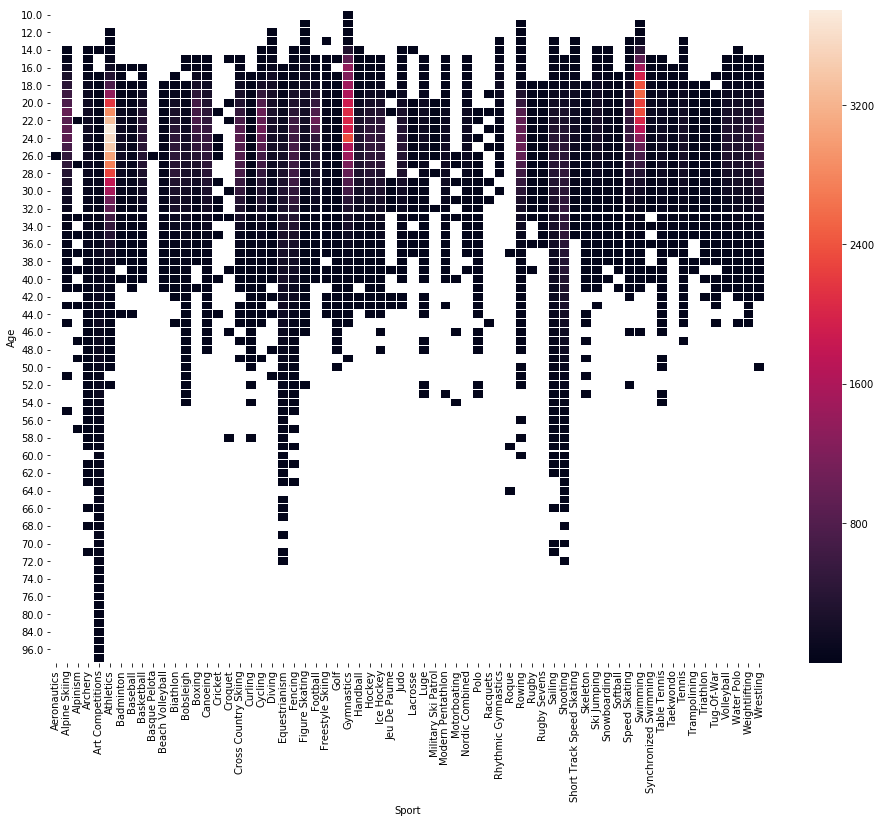

In [72]:
fig, ax = plt.subplots(figsize = (16,12))
heatmap_chart = sns.heatmap(heatmap_data, linewidths = 0.05)

In [ ]:
#Athletics, Gymnastics and swimming are th emost common sports in the Olympics. Hihglighted in red above. 
#The highest age range is in Arts competition, Archery, Equestrianism and shooting. 